
# Linear Regression Project

An Ecommerce company based in New York City sells clothing online but also has in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. 

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data

the Ecommerce Customers csv file from the company has 
Customer info:
Email, Address, and their color Avatar

Numerical value columns:
* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 


In [3]:
customers = pd.read_csv('Ecommerce Customers')

**Check the head of customers, and check out its info() and describe() methods.**

In [4]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [6]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

For the rest of the exercise we'll only be using the numerical data of the csv file
___

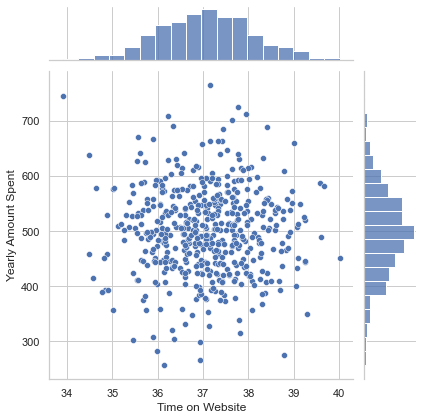

In [12]:
import seaborn as sns
sns.set_style('whitegrid')
sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent', data=customers)

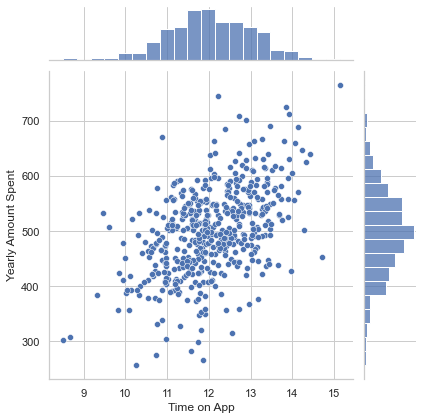

In [13]:
sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data=customers)

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

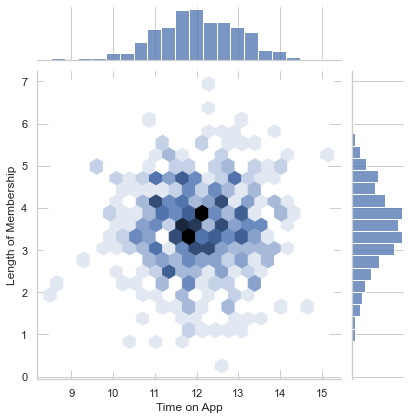

In [14]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=customers)

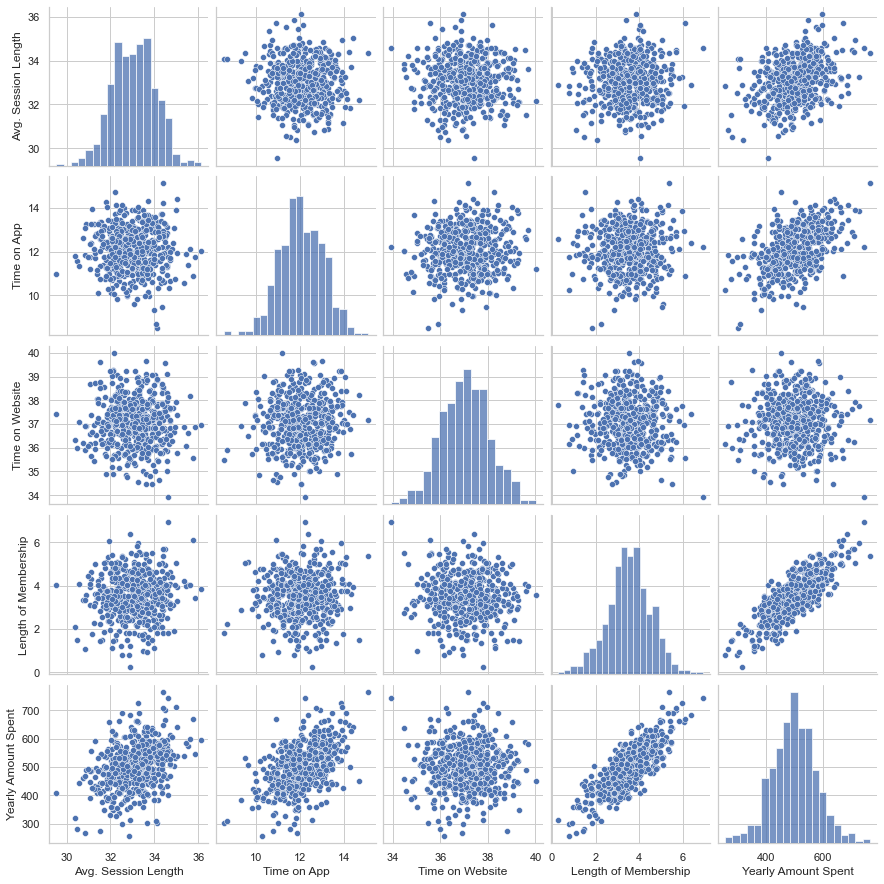

In [15]:
sns.pairplot(data=customers)

**Based off this plot length of membership looks to be the most correlated feature with Yearly Amount Spent**

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

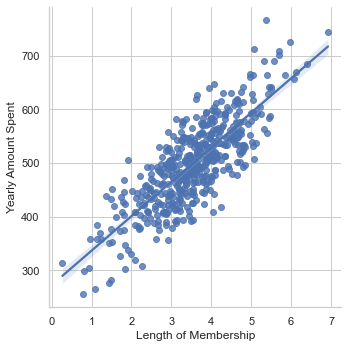

In [17]:
sns.lmplot(x='Length of Membership', y = 'Yearly Amount Spent', data = customers)

## Training and Testing Data

** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [18]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [28]:
X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [29]:
y = customers[['Yearly Amount Spent']]

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [32]:
X.shape

(500, 4)

## Training the Model


In [ ]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [34]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [35]:
lm.fit(X_train, y_train)

LinearRegression()

**Print out the coefficients of the model**

In [36]:
print('Coefficients:\n', lm.coef_)

Coefficients:
 [[25.98154972 38.59015875  0.19040528 61.27909654]]


## Predicting Test Data


In [37]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'predictions')

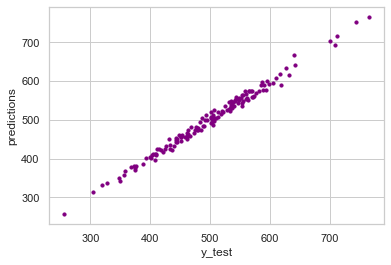

In [40]:
plt.scatter(y_test, predictions, s = 10, c = 'purple')
plt.xlabel('y_test')
plt.ylabel('predictions')

## Evaluating the Model



In [43]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 7.2281486534308135
MSE: 79.81305165097434
RMSE: 8.933815066978628


## Residuals

**Plot a histogram of the residuals to check if it looks normally distributed.**

<AxesSubplot:ylabel='Count'>

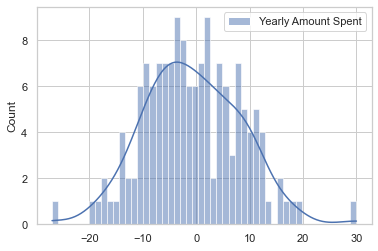

In [46]:
sns.histplot((y_test-predictions), bins = 50, kde = True)

## Conclusion
To figure out the answer to the original question (do we focus our efforst on mobile app or website development?), try to interpret the coefficients

In [50]:
X.columns.shape

(4,)

In [53]:
lm.coef_

array([[25.98154972, 38.59015875,  0.19040528, 61.27909654]])

In [61]:
coefs = [lm.coef_]

In [65]:
coefficients = pd.DataFrame(lm.coef_.transpose(),X.columns)


In [68]:
coefficients.columns = ['Coeffecient']
coefficients

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


We can see that time on app has more impact on the total amount spent. The company should focus more on the app to improve its functioning as it is a preferred mode compared to the webiste